# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [3]:
! git clone https://github.com/Troy-S-Meink/linearRegression

Cloning into 'linearRegression'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 82 (delta 28), reused 13 (delta 7), pack-reused 30 (from 1)
Receiving objects: 100% (82/82), 2.66 MiB | 16.21 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [5]:
# Importing relavant packages:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
# 1.
path = '/content/linearRegression/04_hedonic_pricing/pierce_county_house_sales.csv' # Pulling the houses data
df = pd.read_csv(path, low_memory=False) # Creating an airbnb dataframe

# Displaying the dataframe to take a preliminary look
df.head()

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,NaN,NaN,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED


In [11]:
# Pulling only the data I want to work with:
df = df[['sale_price', 'house_square_feet', 'bedrooms', 'bathrooms']]

# Displaying the dataframe again to verify the changes
df.head()

,sale_price,house_square_feet,bedrooms,bathrooms
0,380000,2157,3,3
1,383000,2238,4,3
2,419900,1452,3,2
3,251660,832,2,1
4,500000,1780,3,2


In [13]:
# Replacing all of the string values with numbers
df['sale_price'] = pd.to_numeric(df['sale_price'])
df['house_square_feet'] = pd.to_numeric(df['house_square_feet'])
df['bedrooms'] = pd.to_numeric(df['bedrooms'])
df['bathrooms'] = pd.to_numeric(df['bathrooms'])

<ipython-input-13-3df87a754fb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sale_price'] = pd.to_numeric(df['sale_price'])
<ipython-input-13-3df87a754fb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['house_square_feet'] = pd.to_numeric(df['house_square_feet'])
<ipython-input-13-3df87a754fb8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,sale_price,house_square_feet,bedrooms,bathrooms
0,380000,2157,3,3
1,383000,2238,4,3
2,419900,1452,3,2
3,251660,832,2,1
4,500000,1780,3,2


In [20]:
# Taking a quick look at some statistics
print(df.describe(), '\n')

# Checking for if there are any null values (there is none)
print(df.isnull().sum())

         sale_price  house_square_feet      bedrooms     bathrooms
count  1.681400e+04       16814.000000  16814.000000  16814.000000
mean   4.612332e+05        1879.941953      3.277983      2.317176
std    2.360833e+05         760.419008      0.891240      0.827956
min    2.000000e+03           1.000000      0.000000      0.000000
25%    3.480000e+05        1320.000000      3.000000      2.000000
50%    4.165000e+05        1774.000000      3.000000      2.000000
75%    5.238065e+05        2352.000000      4.000000      3.000000
max    6.130000e+06        9510.000000     25.000000      8.000000 

sale_price           0
house_square_feet    0
bedrooms             0
bathrooms            0
dtype: int64


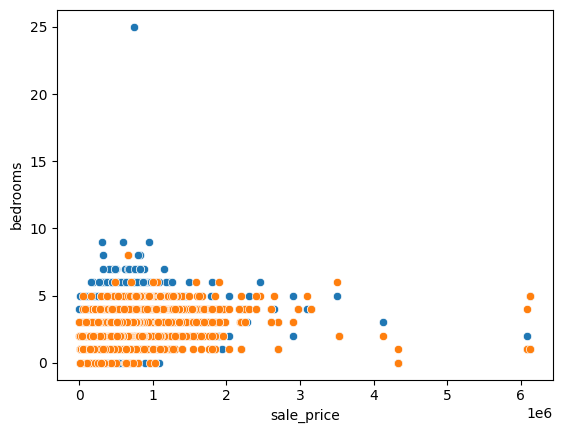

In [26]:
# Taking a look at scatterplots of the data
sns.scatterplot(x=df['sale_price'],y=df['bedrooms'])
sns.scatterplot(x=df['sale_price'],y=df['bathrooms'])
plt.show()

In [25]:
# 2.
# Turning the number of bathrooms and
#  bedrooms into categorical variables
pd.get_dummies(df['bedrooms'])
pd.get_dummies(df['bathrooms'])

,0,1,2,3,4,5,6,8
0,False,False,False,True,False,False,False,False
1,False,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
16809,False,False,False,True,False,False,False,False
16810,False,False,False,True,False,False,False,False
16811,False,True,False,False,False,False,False,False
16812,False,True,False,False,False,False,False,False


In [ ]:
# 3.